Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
custom_colors = [
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#5254a3', '#9c9ede', '#6b6ecf', '#b5cf6b', '#cedb9c',
    '#e7ba52', '#bd9e39', '#ad494a', '#a55194', '#de9ed6',
    '#3182bd', '#31a354', '#756bb1', '#ff9896', '#c5b0d5'
]




Import and Analyze Data 

In [2]:
data=pd.read_csv(r"D:\Downloads\loan_approval_dataset.csv")
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [5]:
data.sample(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
464,465,3,Not Graduate,Yes,6100000,20900000,18,470,500000,8500000,18000000,7500000,Rejected
2893,2894,3,Graduate,Yes,1100000,4100000,20,863,800000,1100000,3700000,600000,Approved
2820,2821,2,Not Graduate,Yes,8400000,20800000,12,335,6700000,12300000,18500000,10100000,Rejected
4166,4167,1,Graduate,No,500000,1300000,14,619,1500000,100000,2000000,500000,Approved
2638,2639,0,Graduate,Yes,2900000,9900000,8,312,1800000,4500000,11200000,3700000,Rejected
985,986,1,Not Graduate,Yes,4300000,14100000,12,525,2100000,1100000,14100000,5500000,Rejected
3832,3833,0,Not Graduate,No,8000000,18000000,16,791,13900000,10300000,23400000,10600000,Approved
1889,1890,5,Graduate,Yes,6900000,18600000,18,307,3500000,4800000,25300000,4200000,Rejected
851,852,1,Not Graduate,No,4900000,18500000,4,612,6100000,5900000,16400000,2900000,Approved
638,639,1,Graduate,Yes,5200000,19500000,12,778,5200000,4300000,19900000,5800000,Approved


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [10]:
data.columns=[col.strip() for col in data.columns]
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [11]:
data['loan_status']=data['loan_status'].str.strip()
data['self_employed']=data['self_employed'].str.strip()
data['education']=data['education'].str.strip()

In [12]:
data['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

In [13]:
data.drop('loan_id',axis=1,inplace=True)
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [14]:
data['no_of_dependents'].value_counts()

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

Visulize Data

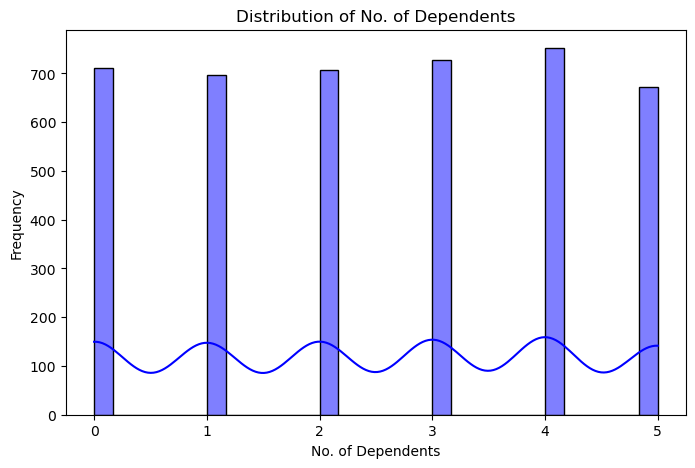

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data['no_of_dependents'],bins=30,color='blue',kde=True)
plt.title('Distribution of No. of Dependents')
plt.xlabel('No. of Dependents')
plt.ylabel('Frequency')
plt.show()

In [16]:
data['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

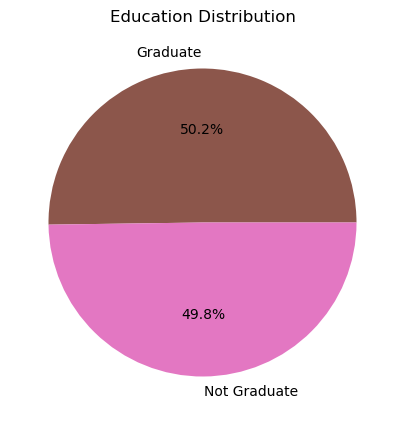

In [17]:
plt.figure(figsize=(8,5))
plt.pie(data['education'].value_counts(),labels=data['education'].value_counts().index,autopct='%1.1f%%',colors=custom_colors)
plt.title('Education Distribution')
plt.show()

In [18]:
data['self_employed'].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

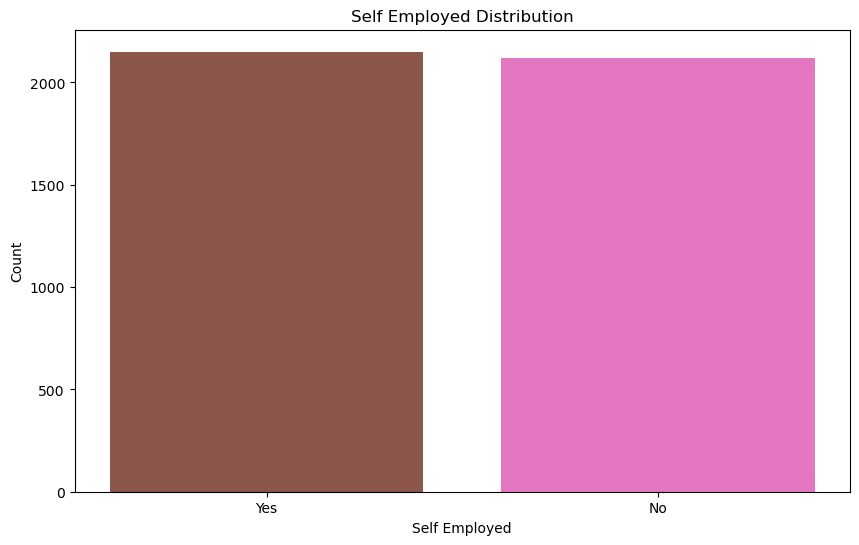

In [19]:
plt.figure(figsize=(10,6))
plt.bar(data['self_employed'].value_counts().index, data['self_employed'].value_counts().values, color=custom_colors)
plt.title('Self Employed Distribution')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

In [20]:
data['loan_status'].value_counts()  

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

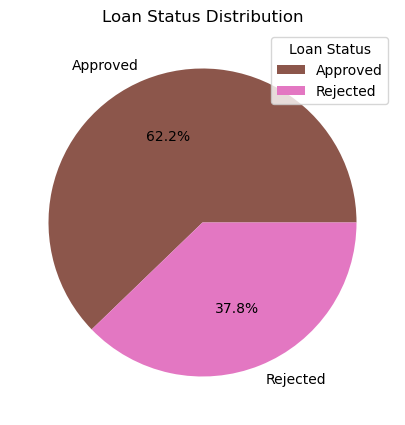

In [21]:
plt.figure(figsize=(8,5))
plt.pie(data['loan_status'].value_counts(),labels=data['loan_status'].value_counts().index,autopct='%1.1f%%',colors=custom_colors)
plt.title('Loan Status Distribution')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

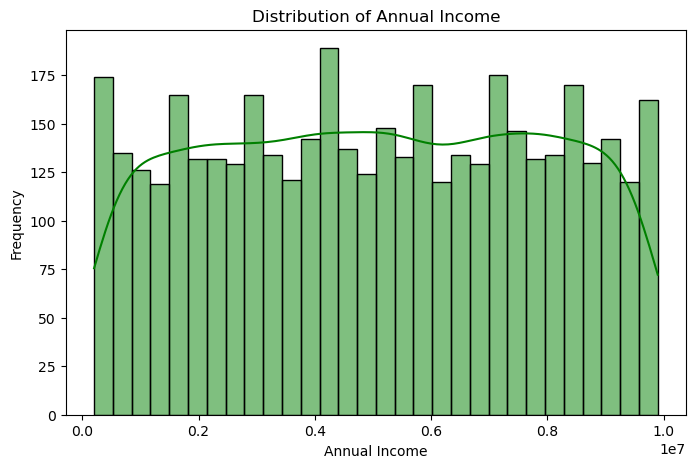

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='income_annum',bins=30,color='green',kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

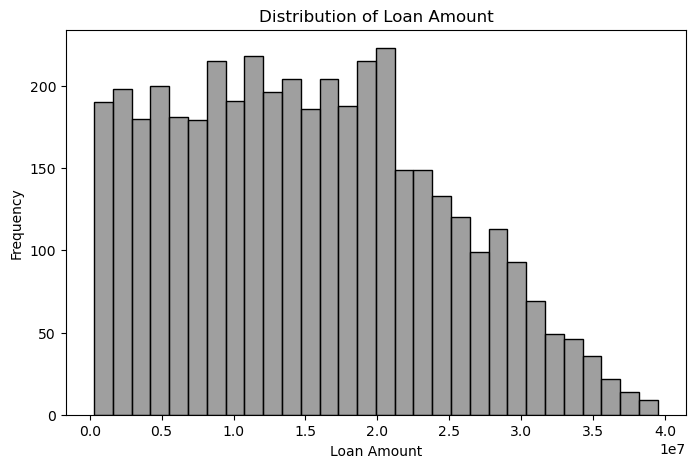

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(data['loan_amount'],bins=30,color=custom_colors[2])
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

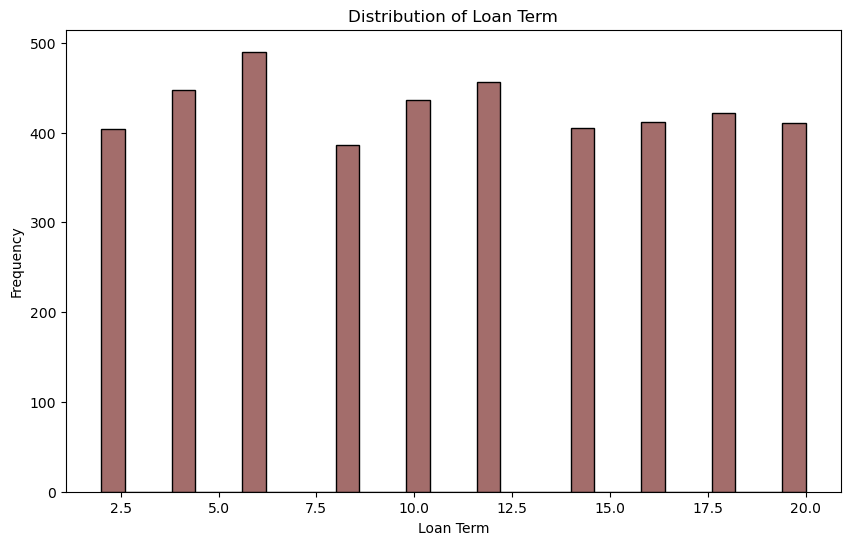

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data['loan_term'],bins=30,color=custom_colors[8])
plt.title('Distribution of Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Frequency')
plt.show()

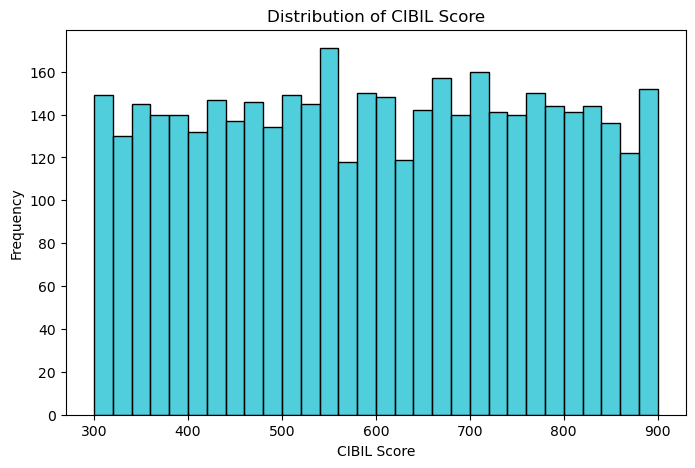

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data['cibil_score'], bins=30, color=custom_colors[4])
plt.title('Distribution of CIBIL Score')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.show()

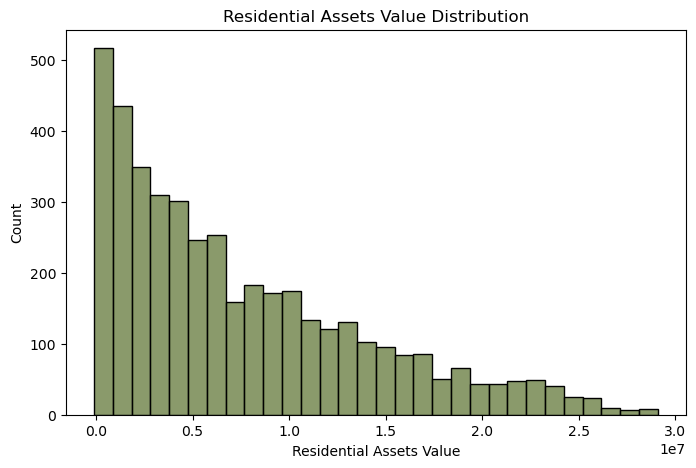

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(x='residential_assets_value', data=data, color=custom_colors[6], bins=30)
plt.title('Residential Assets Value Distribution')
plt.xlabel('Residential Assets Value')
plt.ylabel('Count')
plt.show()

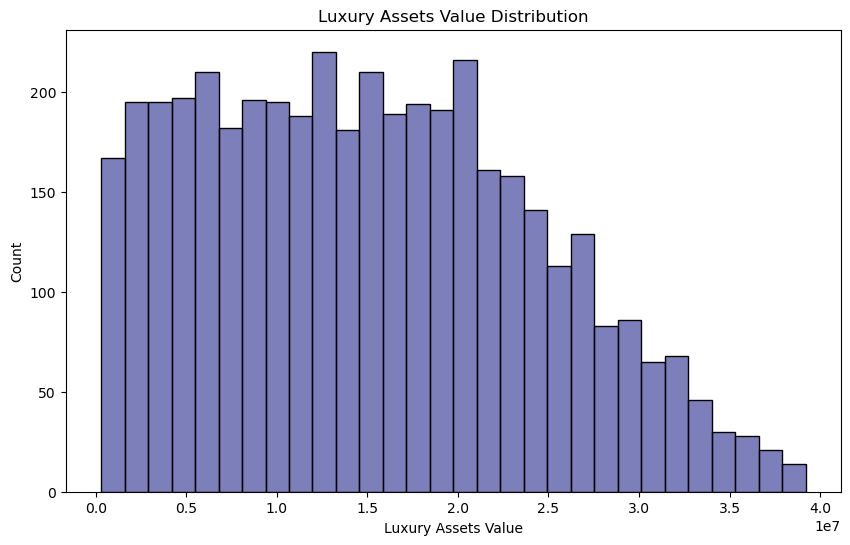

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(data['luxury_assets_value'], bins=30, color=custom_colors[10])
plt.title('Luxury Assets Value Distribution')
plt.xlabel('Luxury Assets Value')
plt.ylabel('Count')
plt.show()

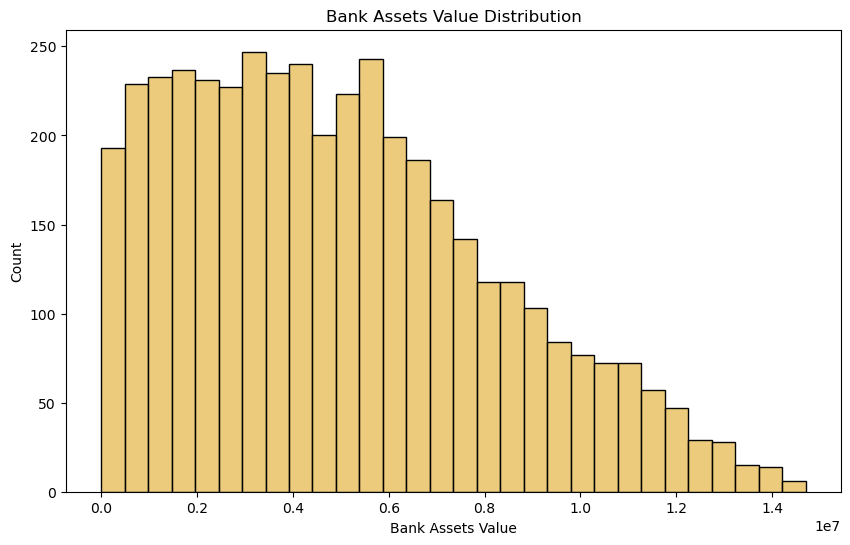

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data['bank_asset_value'], bins=30, color=custom_colors[15])
plt.title('Bank Assets Value Distribution')
plt.xlabel('Bank Assets Value')
plt.ylabel('Count')
plt.show()

C:\Users\dg038\AppData\Local\Temp\ipykernel_8096\3870866041.py:2: UserWarning: The palette list has more values (25) than needed (2), which may not be intended.
  sns.countplot(x='education',hue='loan_status',data=data,palette=custom_colors)


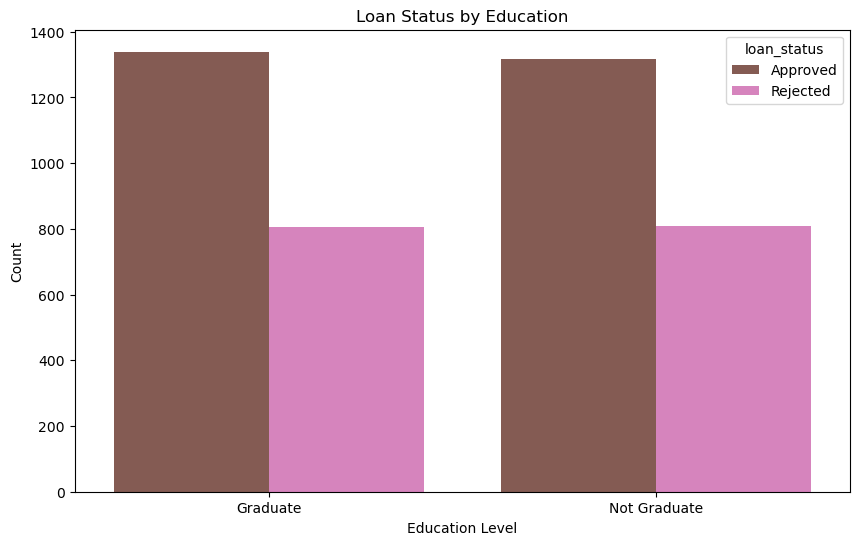

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='education',hue='loan_status',data=data,palette=custom_colors)
plt.title('Loan Status by Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

C:\Users\dg038\AppData\Local\Temp\ipykernel_8096\1592313769.py:2: UserWarning: The palette list has more values (25) than needed (2), which may not be intended.
  sns.countplot(x='self_employed',hue='loan_status',data=data,palette=custom_colors)


<Axes: xlabel='self_employed', ylabel='count'>

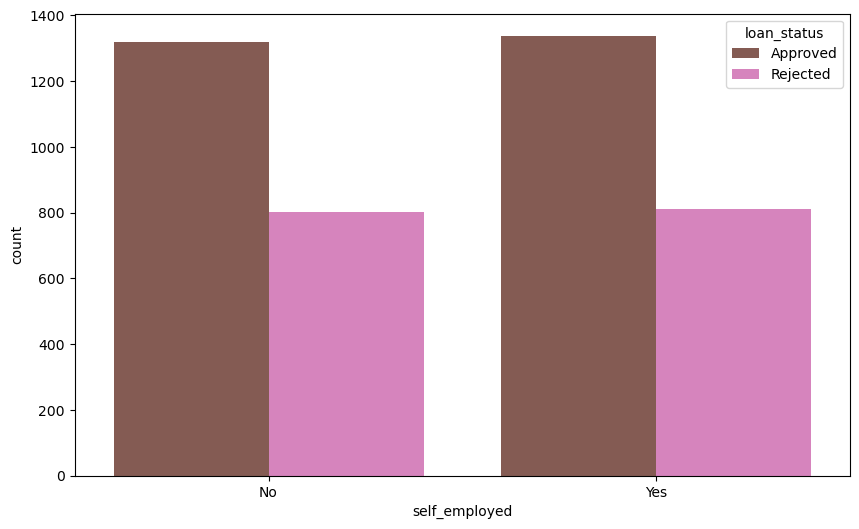

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='self_employed',hue='loan_status',data=data,palette=custom_colors)

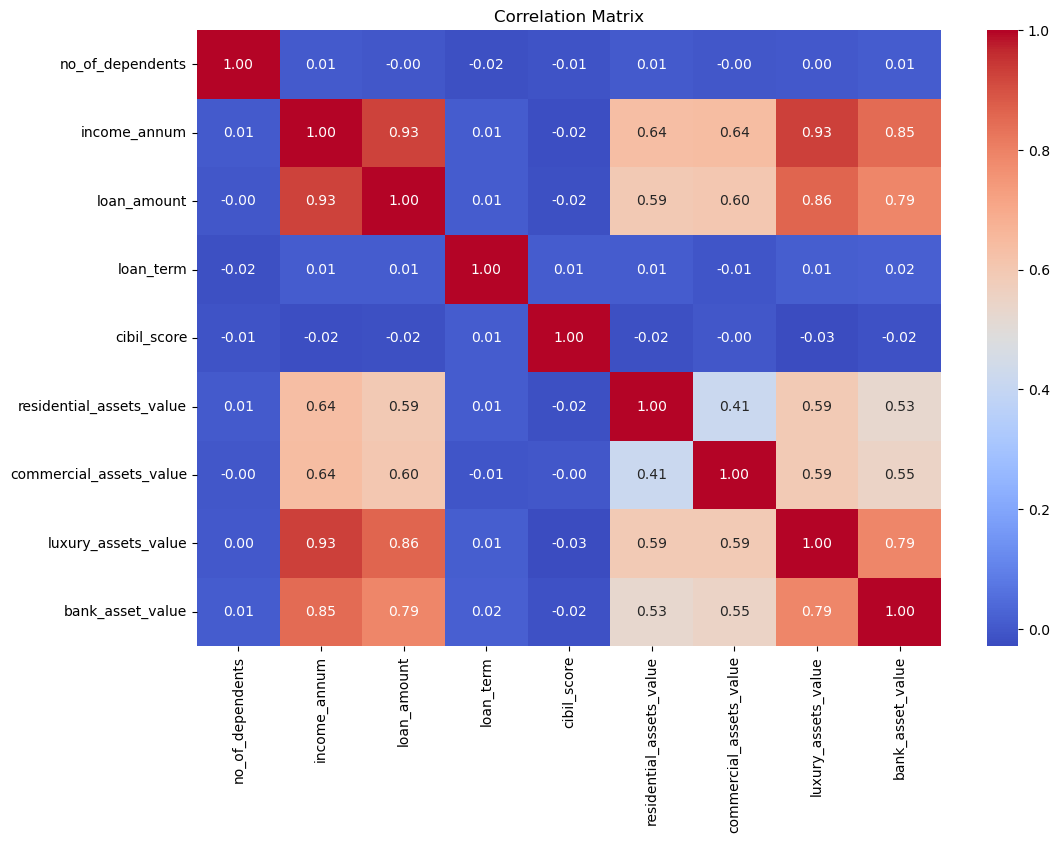

In [31]:
corr = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


Encode Categorical Data

In [32]:
data['education'] = data['education'].replace({'Graduate': 1, 'Not Graduate': 0})
data['self_employed'] = data['self_employed'].replace({'Yes': 1, 'No': 0})
data['loan_status'] = data['loan_status'].replace({'Approved': 1, 'Rejected': 0})

C:\Users\dg038\AppData\Local\Temp\ipykernel_8096\541665316.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education'] = data['education'].replace({'Graduate': 1, 'Not Graduate': 0})
C:\Users\dg038\AppData\Local\Temp\ipykernel_8096\541665316.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['self_employed'] = data['self_employed'].replace({'Yes': 1, 'No': 0})
C:\Users\dg038\AppData\Local\Temp\ipykernel_8096\541665316.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

Split data Into train And test

In [33]:
data=data.drop(columns=['luxury_assets_value','bank_asset_value'])

In [34]:
x=data.drop('loan_status',axis=1)
y=data['loan_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [36]:
!pip install imblearn

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

Logistic regression imbalanced data

In [38]:
pipe=Pipeline([('scaler',StandardScaler()),('lr',LogisticRegression())])
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [39]:
y_pred=pipe.predict(x_test)

In [40]:
acc = accuracy_score(y_test, y_pred)
acc

0.9028103044496487

In [41]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.90       854
   macro avg       0.90      0.89      0.90       854
weighted avg       0.90      0.90      0.90       854



In [42]:
conf=confusion_matrix(y_test, y_pred)
print(conf)

[[273  45]
 [ 38 498]]


Text(0.5, 1.0, 'Confusion Matrix')

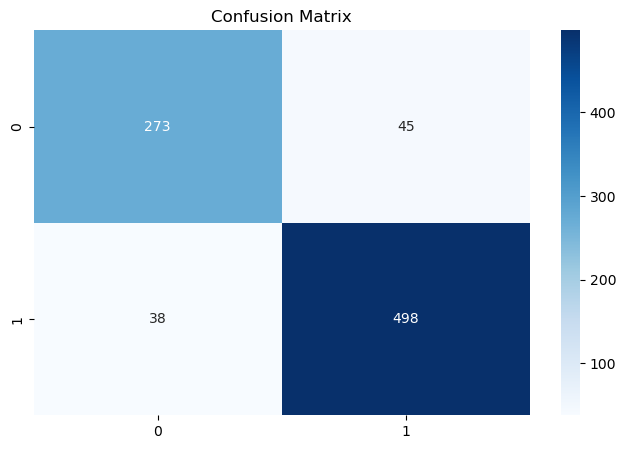

In [43]:
plt.figure(figsize=(8,5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

Logistic Regression Balanced Data

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [45]:
pipee = Pipeline([
	('scaler', StandardScaler()),
	('smote', SMOTE()),
	('lr', LogisticRegression())
])
pipee.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('lr', LogisticRegression())])

Evaluate the Model

In [46]:
y_pred=pipee.predict(x_test)

In [47]:
acc=accuracy_score(y_test,y_pred)
acc

0.9238875878220141

Classification rep

In [48]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       323
           1       0.95      0.92      0.94       531

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.92      0.92       854



Confusion matrix

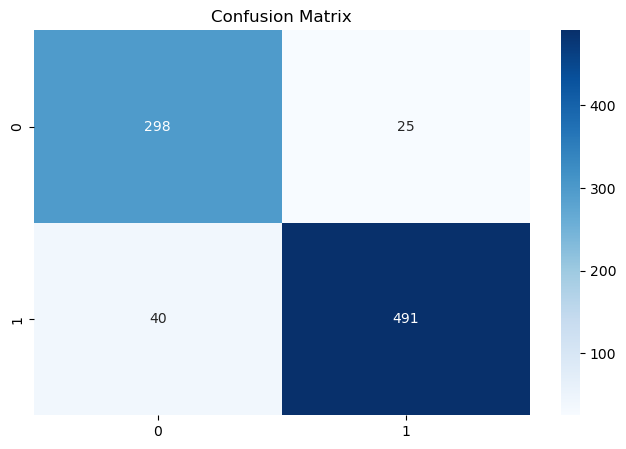

In [49]:
conf=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Import Data And encode categorical Data for decision Tree model

In [50]:
df=pd.read_csv(r"D:\Downloads\loan_approval_dataset.csv")

In [51]:
df=df.drop(columns=['loan_id'],axis=1)

In [52]:
df.columns = df.columns.str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

In [53]:
df['education']=df['education'].replace({'Graduate':1,'Not Graduate':0})
df['self_employed']=df['self_employed'].replace({'Yes':1,'No':0})
df['loan_status']=df['loan_status'].replace({'Approved':1,'Rejected':0})

C:\Users\dg038\AppData\Local\Temp\ipykernel_8096\1995496005.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education']=df['education'].replace({'Graduate':1,'Not Graduate':0})
C:\Users\dg038\AppData\Local\Temp\ipykernel_8096\1995496005.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['self_employed']=df['self_employed'].replace({'Yes':1,'No':0})
C:\Users\dg038\AppData\Local\Temp\ipykernel_8096\1995496005.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

Split Data

In [54]:
x=df.drop('loan_status',axis=1)
y=df['loan_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Train the model

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [56]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

Evaluate the model

In [57]:
y_pred=dt.predict(x_test)

In [58]:
acc=dt.score(x_test,y_test)
acc

0.9765807962529274

Classification rep

In [59]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



Confision Matrix

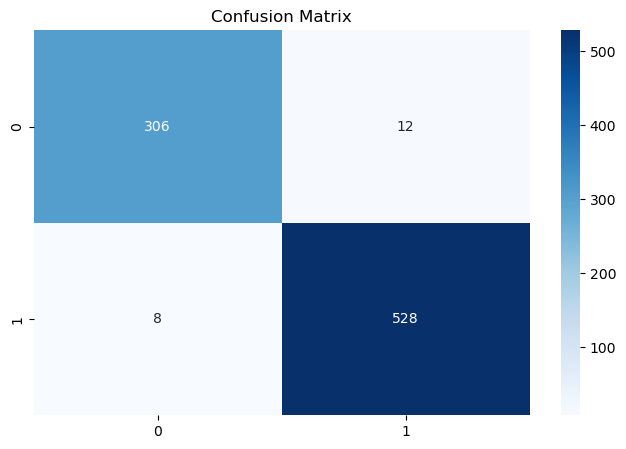

In [60]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Models Comparison

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = []

def evaluate_model(model_name, model, X_train, X_test, y_test, y_pred):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)

    results.append({
        "Model":model_name,
        "Accurcay Score %" : accuracy, 
        "Recall" : recall,
        "Precision" : precision,
        "F1 Score" : f1
    })

In [62]:
evaluate_model("LogisticRegression with Smote", pipee, x_train, x_test, y_test,y_pred)
evaluate_model("Decision Tree Classifier", dt, x_train, x_test, y_test,y_pred)
evaluate_model("LogisticRegression without Smote", pipe, x_train, x_test, y_test,y_pred)
results_df = pd.DataFrame(results)
results_df

,Model,Accurcay Score %,Recall,Precision,F1 Score
0,LogisticRegression with Smote,90.87,0.91,0.95,0.93
1,Decision Tree Classifier,97.54,0.98,0.98,0.98
2,LogisticRegression without Smote,90.52,0.93,0.92,0.92
